# Trend maps of GLORYS `ssh`, `u`, `v` (1993-2021)

In [2]:
pip install copernicusmarine

  Preparing metadata (setup.py) ... done
   ---------------------------------------- 5.0/5.0 MB 149.8 MB/s eta 0:00:00
   ---------------------------------------- 2.0/2.0 MB 170.2 MB/s eta 0:00:00
   ---------------------------------------- 13.4/13.4 MB 171.1 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5071 sha256=fa4281995e70a1f71e54e840779d9436c6a1e012704e7a14c5731a53aaeddfbf
  Stored in directory: /tmp/cache_Shanice.Bailey/pip/wheels/71/c1/da/23077eb3b87d24d6f3852ed1ed1a1ac2d3c885ad6ebd2b4a07
Successfully built asciitree
  Attempting uninstall: zarr
    Found existing installation: zarr 3.0.1
    Uninstalling zarr-3.0.1:
      Successfully uninstalled zarr-3.0.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import modules
import copernicusmarine

In [6]:
# Set parameters
data_request = {
   "GLOBAL_MULTIYEAR_PHY_001_030" : "cmems_mod_glo_phy_my_0.083deg_P1D-m",
   "longitude" : [-100, -72], 
   "latitude" : [17, 31],
   "depth" : [0.49402499198913574, 1.49402499198914],
   "time" : ["1993-01-01", "2021-06-30"],
   "variables" : ["sea_surface_height_above_geoid", 
                  "eastward_sea_water_velocity",
                  "northward_sea_water_velocity"]
}

# Load xarray dataset
ds = copernicusmarine.open_dataset(
    dataset_id = data_request["GLOBAL_MULTIYEAR_PHY_001_030"],
    minimum_longitude = data_request["longitude"][0],
    maximum_longitude = data_request["longitude"][1],
    minimum_latitude = data_request["latitude"][0],
    maximum_latitude = data_request["latitude"][1],
    minimum_depth = data_request["depth"][0],
    maximum_depth = data_request["depth"][1],
    start_datetime = data_request["time"][0],
    end_datetime = data_request["time"][1],
    variables = data_request["variables"],
    chunk_size_limit=0,
)

# Print loaded dataset information
print(ds)

INFO - 2025-02-23T19:21:12Z - Selected dataset version: "202311"
INFO - 2025-02-23T19:21:12Z - Selected dataset part: "default"
INFO - 2025-02-23T19:21:15Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username:

  sbailey2


Copernicus Marine password:

  ········


<xarray.Dataset> Size: 14GB
Dimensions:    (depth: 1, latitude: 169, longitude: 337, time: 10408)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 676B 17.0 17.08 17.17 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 1kB -100.0 -99.92 -99.83 ... -72.08 -72.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 5GB ...
    uo         (time, depth, latitude, longitude) float64 5GB ...
    vo         (time, depth, latitude, longitude) float64 5GB ...
Attributes:
    source:       MERCATOR GLORYS12V1
    institution:  MERCATOR OCEAN
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation


In [7]:
ds.to_netcdf(f"{data_request['GLOBAL_MULTIYEAR_PHY_001_030']}.nc") 

In [11]:
import xarray as xr
import matplotlib.pyplot as plt

In [9]:
glorys = xr.open_dataset('cmems_mod_glo_phy_my_0.083deg_P1D-m.nc')

In [10]:
glorys

<xarray.Dataset> Size: 14GB
Dimensions:    (depth: 1, latitude: 169, longitude: 337, time: 10408)
Coordinates:
  * depth      (depth) float32 4B 0.494
  * latitude   (latitude) float32 676B 17.0 17.08 17.17 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 1kB -100.0 -99.92 -99.83 ... -72.08 -72.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 5GB ...
    uo         (time, depth, latitude, longitude) float64 5GB ...
    vo         (time, depth, latitude, longitude) float64 5GB ...
Attributes:
    source:       MERCATOR GLORYS12V1
    institution:  MERCATOR OCEAN
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation

In [35]:
gom = dict(longitude=slice(-98, -81), latitude=slice(17.5, 31))
ds = glorys.sel(**gom).isel(depth=0)

In [36]:
ds

<xarray.Dataset> Size: 8GB
Dimensions:    (latitude: 163, longitude: 205, time: 10408)
Coordinates:
    depth      float32 4B 0.494
  * latitude   (latitude) float32 652B 17.5 17.58 17.67 ... 30.83 30.92 31.0
  * longitude  (longitude) float32 820B -98.0 -97.92 -97.83 ... -81.08 -81.0
  * time       (time) datetime64[ns] 83kB 1993-01-01 1993-01-02 ... 2021-06-30
Data variables:
    zos        (time, latitude, longitude) float64 3GB ...
    uo         (time, latitude, longitude) float64 3GB ...
    vo         (time, latitude, longitude) float64 3GB ...
Attributes:
    source:       MERCATOR GLORYS12V1
    institution:  MERCATOR OCEAN
    references:   http://www.mercator-ocean.fr
    Conventions:  CF-1.4
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    comment:      CMEMS product
    history:      2023/06/01 16:20:05 MERCATOR OCEAN Netcdf creation

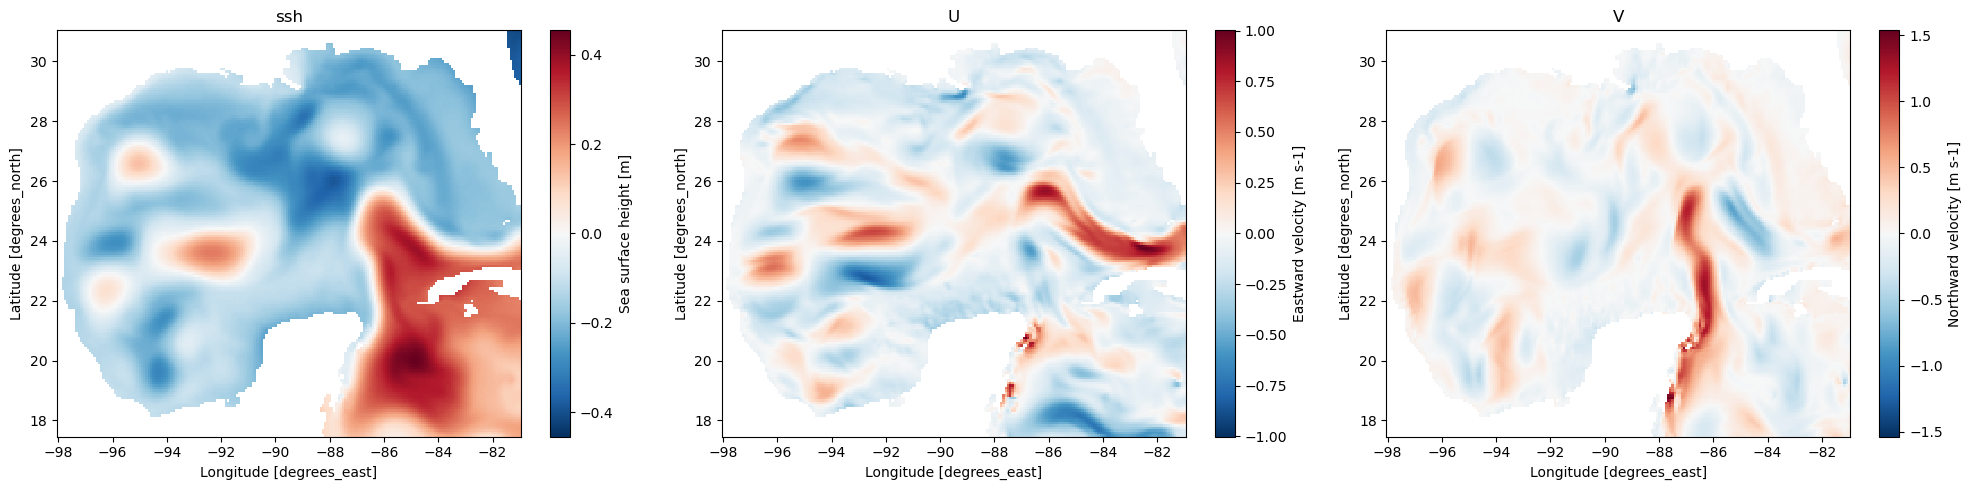

In [38]:
fig, ax = plt.subplots(1,3, figsize=(20,5))
ds.zos[0].plot(ax=ax[0])
ax[0].set_title('ssh')
ds.uo[0].plot(ax=ax[1])
ax[1].set_title('U')
ds.vo[0].plot(ax=ax[2])
ax[2].set_title('V')
plt.tight_layout();